In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [3]:
np.median(df['price'])

450000.0

In [4]:
houses_under_500k = df.loc[df['price'] <= 500000]

In [5]:
houses_under_500k

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0,4.0,0.0,2.0
7,291850.0,3,1.50,1060,9711,1.0,1060,1963,0.0,98198,47.4095,-122.315,1650,9711,0,4.0,0.0,2.0
8,229500.0,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,730,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5.0,0.0,2.0
21591,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,5.0,0.0,2.0
21592,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,2.0
21593,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,5.0,0.0,2.0


In [7]:
above_500k = df.loc[df['price'] > 500000]

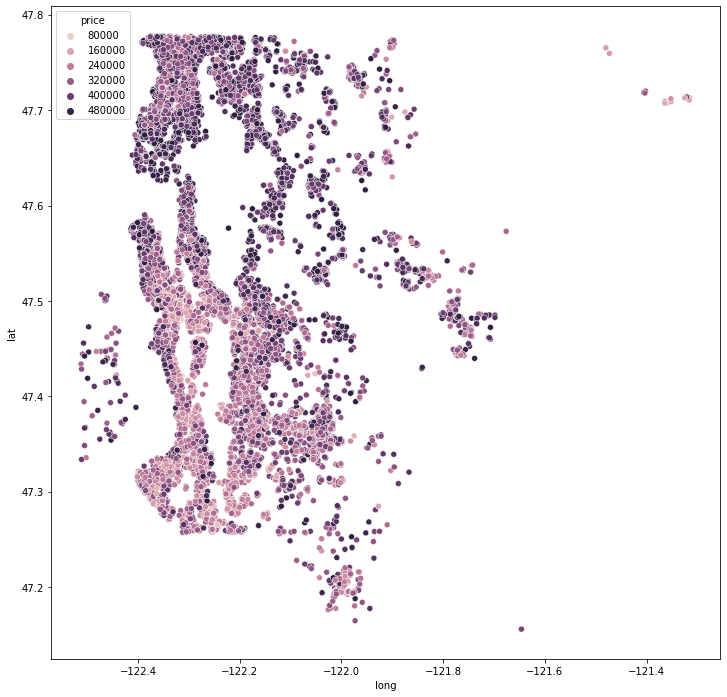

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k,
               hue='price');

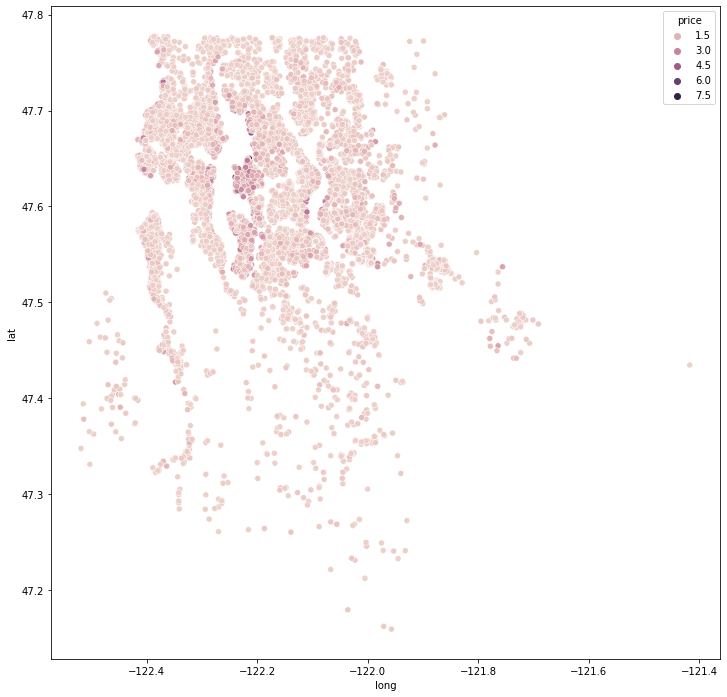

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k,
               hue='price',
               cmap='Oranges');

In [10]:
houses_under_500k['sqft_living'].describe()

count    12546.000000
mean      1668.947952
std        583.508820
min        370.000000
25%       1240.000000
50%       1600.000000
75%       2030.000000
max       5067.000000
Name: sqft_living, dtype: float64

In [11]:
above_500k['sqft_living'].describe()

count     9049.000000
mean      2650.621063
std        989.836522
min        680.000000
25%       1960.000000
50%       2520.000000
75%       3180.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [12]:
houses_under_500k['grades'].describe()

count    12546.000000
mean         4.113263
std          0.792555
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: grades, dtype: float64

In [13]:
above_500k['grades'].describe()

count    9049.000000
mean        5.413195
std         1.196816
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: grades, dtype: float64

In [16]:
houses_under_500k['zipcode'].value_counts()

98042    523
98038    519
98023    477
98133    441
98058    420
        ... 
98109     14
98102     14
98005      8
98040      1
98004      1
Name: zipcode, Length: 69, dtype: int64

In [17]:
#top value counts for above 500k, this tells us 80% of those houses in this zipcode are above ~500k
len(houses_under_500k.loc[houses_under_500k['zipcode'] == 98052])

139

In [15]:
above_500k['zipcode'].value_counts()

98052    435
98006    420
98115    376
98103    365
98074    355
        ... 
98188      6
98148      2
98030      1
98032      1
98168      1
Name: zipcode, Length: 69, dtype: int64

In [14]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
769,405000.0,3,2.50,3170,12750,2.0,2360,1995,0.0,98023,47.3384,-122.336,2970,13125,810,7.0,0.0,2.0
1218,475000.0,4,3.50,3660,14401,2.0,2660,1994,0.0,98023,47.3076,-122.396,2780,10653,1000,7.0,0.0,2.0
1980,402500.0,4,2.50,2600,11951,2.0,2600,1988,0.0,98023,47.3053,-122.340,2820,12093,0,7.0,0.0,2.0
3771,472500.0,4,2.50,2960,223462,2.0,2960,2001,0.0,98030,47.3646,-122.211,2770,16482,0,7.0,0.0,2.0
5388,425000.0,3,2.50,2670,13218,1.0,2670,1988,0.0,98042,47.3683,-122.153,1960,13130,0,7.0,0.0,3.0
6140,420000.0,4,2.50,2480,8626,2.0,2480,2001,0.0,98001,47.3185,-122.262,2990,9033,0,7.0,0.0,2.0
6283,490000.0,4,2.50,3020,8302,2.0,3020,1994,0.0,98042,47.3630,-122.127,3020,8406,0,7.0,0.0,3.0
6899,465000.0,3,2.50,2870,25663,2.0,2870,1988,0.0,98003,47.2769,-122.333,2950,24347,0,7.0,0.0,2.0
7147,475000.0,4,2.50,3740,8700,1.0,2260,2004,0.0,98058,47.4587,-122.117,2650,6333,1480,7.0,0.0,2.0
7378,450000.0,3,2.50,1990,3478,2.0,1520,1990,0.0,98199,47.6361,-122.399,1710,6157,470,7.0,0.0,2.0
